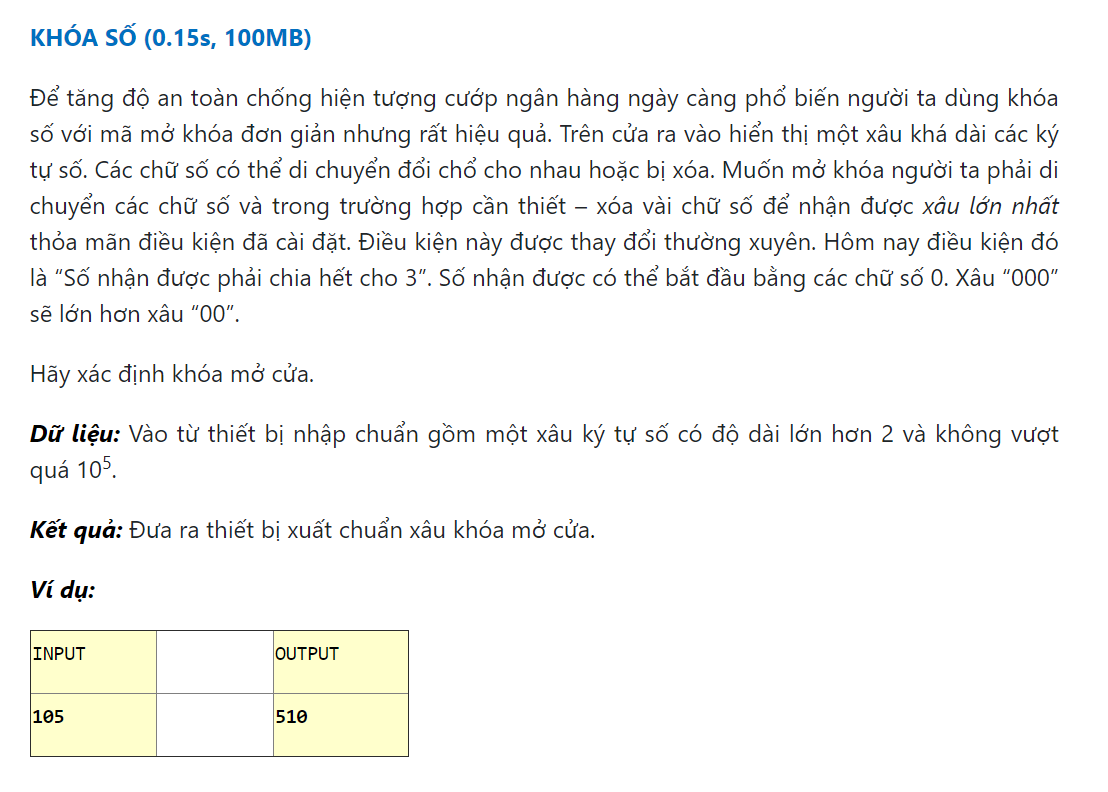



# ABSTRACTION

Tìm số lớn nhất chia hết cho 3 từ các chữ số trong 1 chuỗi kĩ tự.

# DECOMPOSITION

- Xử lý kiểu chuỗi.
- Bài toán chia hết cho 3.
- Bài toán sắp xếp.

# PATTERN RECOGNITION

Vì input là chuỗi số nên cần slice ra thành từng chữ số và chuyển sang integer. 

Yêu cầu tiếp theo output là số LỚN NHẤT và CHIA HẾT cho 3.
- Dấu hiệu chia hết cho 3: tổng các chữ số của số đó chia hết cho 3. (tạm gọi là sum_num)
- Tuy nhiên, sẽ có những chữ số làm cho sum_num không chia hết cho 3. 

=> Phải chọn để xóa n chữ số đó để sum_num vẫn chia hết cho 3 và số xuất ra là số lớn nhất có thể.

- Chỉ có 3 trường hợp khi lấy 1 chữ số từ 0-9 chia 3:
    + Chia hết. {0,3,6,9}
    + Dư 1.{1,4,7}
    + Dư 2. {2,5,8}
- Vậy chỉ cần xem xét số dư r khi sum_num/3:
    + Nếu chia 3 dư 1 thì xóa ***1*** chữ số nhỏ nhất trong tập dư 1. Nếu tập này rỗng, ta xóa 2 số nhỏ nhất trong tập chia 3 dư 2.
    + Tương tự, chia 3 dư 2 ta xóa 1 chữ số nhỏ nhất trong tập dư 2. Nếu tập này rỗng, ta xóa 2 số nhỏ nhất trong tập chia 3 dư 1.
    
=> Chỉ xóa 1 hoặc 2 số khi số input ko chia hết cho 3.

- Bài toán sắp xếp:
    + Vì chuỗi xuất ra là LỚN NHẤT, nên cần phải sắp xếp chuỗi số sau khi đã đảm bảo chia hết cho 3.
    + Nhận thấy rằng cho dù số input có dài đến 10^5 kí tự thì các kí tự chỉ là các chữ số từ 1-9.
    
    => Sẽ có những khoảng sắp xếp theo thứ tự tăng dần sẵn hoặc trùng nhau và những khoảng này số lượng rất nhiều hoặc độ dài rất lớn. 
    
    => Phù hợp cho Tim Sort được cài cho hàm sorted() ở Python vì thuật toán này lợi dụng các khoảng ***RUN*** (những khoảng đã sắp theo thứ tự) để giảm các phép so sánh cho thuật toán Merge Sort nó sử dụng. Dưới đây là ảnh tóm tắt ý tưởng Tim Sort từ wikipedia.org.
    
        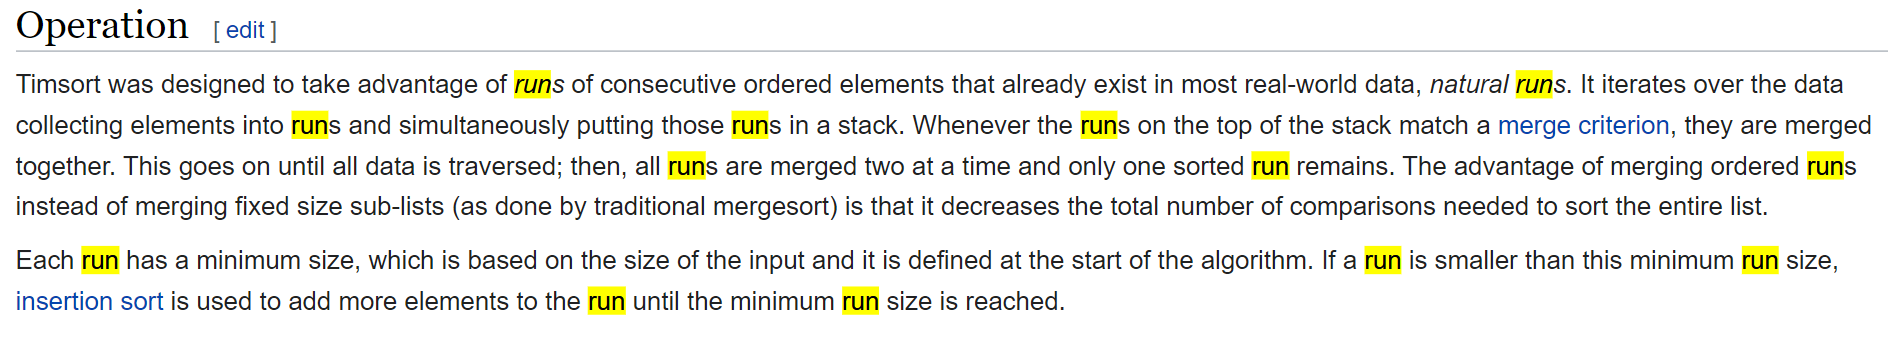
        
Đề bài giới hạn thời gian 0.15s. Mà 1s compute 10^8 phép toán 

=> Time Complexity: O(0.15x10^8) = O(16x10^7)

Với giải thuật trên, ta có:
- Best case: O(n)
- Worst case: O(nlogn) với n max là 10^5 => O(nlogn) = O(10^5xlog(10^5)) = O(16x10^5).

Vậy sử dụng Tim Sort thỏa mãn yêu cầu đề bài.


# ALGORITHM DESIGN

Input: Chuỗi số num (2<n<=10^5)
Output: Chuỗi lớn nhất chia hết cho 3.

Temp:

+ bucket_0, bucket_1, bucket_2: lần lượt là các list chứa các digit từ num chia 3 dư 0, 1 hoặc 2. (Initialize: bucket_0, bucket_1, bucket_2 =[ ])
+ sum_num: tổng các digit trong num (Initialize: sum_num = 0).
+ i: Biến duyệt các phần tử trong chuỗi num (Initialize: i = num[0]).

Các bước thực hiện:
- Nhập vào chuỗi num và bỏ khoảng trắng đầu cuối của chuỗi.
- Khởi tạo cho bucket_0, bucket_1, bucket_2 và sum_num.
- Với i chạy từ đầu đến hết chuỗi num:
    + Chuyển i chứa phần tử kiểu chuỗi trong num thành số nguyên.
    + sum_num += i
    + Thêm i vào bucket_0, bucket_1, bucket_2 nếu i chia 3 dư 0 hoặc 1 hoặc 2.
- Nếu sum_num/3:
    + dư 1: Nếu bucket_1:
         + không rỗng: xóa phần tử min trong bucket_1.
         + rỗng: xóa 2 phần tử min trong bucket_2.
    + dư 2: Nếu bucket_2:
         + không rỗng: xóa phần tử min trong bucket_2.
         + rỗng: xóa 2 phần tử min trong bucket_1.
- Kết bucket_0, bucket_1, bucket_2, sort list mới kết này sau đó chuyển thành kiểu str cho từng phần tử trong list và kết các kí tự lại rồi xuất ra màn hình kết quả.
        


# IMPLEMENTATION


In [14]:
num = input().strip()


def solve():
    bucket_0 = [] #divisible
    bucket_1 = [] #remained 1
    bucket_2 = [] #remained 2
    sum_num = 0
    for i in num:
        i = int(i)
        sum_num += i
        if i % 3 == 0:
            bucket_0.append(i)
        elif i % 3 == 1:
            bucket_1.append(i)
        else:
            bucket_2.append(i)

    if sum_num % 3 == 1:
        if bucket_1:
            bucket_1.remove(min(bucket_1))
        else:
            bucket_2.remove(min(bucket_2))
            bucket_2.remove(min(bucket_2))

    elif sum_num % 3 == 2:
        if bucket_2:
            bucket_2.remove(min(bucket_2))
        else:
            bucket_1.remove(min(bucket_1))
            bucket_1.remove(min(bucket_1))
    print(''.join(map(str, sorted(bucket_0+bucket_1+bucket_2, reverse=True))))
solve()

10782
87210
